https://financedata.github.io/posts/finance-data-reader-users-guide.html

# 패키지 설치

아래 세 종류의 패키지 알아봤는데, finance-datareader 사용하면 될 듯

In [5]:
# !pip install finance-datareader, pykrx, yfinance

# 종목 확인

In [22]:
import numpy as np
import pandas as pd
import datetime
import dateutil
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import FinanceDataReader as fdr

# OHLC (Open, High, Low, Close)
from mpl_finance import candlestick2_ohlc

In [2]:
# 코스피 상위 10개 종목 확인
kospi_list_df = fdr.StockListing('KOSPI')[:50]
display(kospi_list_df)

# nasdaq_list_df = fdr.StockListing('NASDAQ')[:10]
# display(nasdaq_list_df)

# 암호화폐의 경우, 종목 리스트 조회 기능은 따로 없는 것 같고,
# 지원 심볼: ['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'XRP', 'BUSD', 'ADA', 'SOL', 'DOGE']
# 위 리스트 데이터만 제공하는 듯 - 대표적인 비트코인, 이더리움, 맆ㄹ 정도만 조회 해보겠음

# 암호화폐의 국내 / 미국 가격 차이를 비교하기 위해선 환율 정보도 필요하므로, 환율 데이터도 로드
# 환율 심볼: 'USD/KRW'

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,81300,3,0,0.00,80800,81400,80500,13089576,1060566849818,485343321315000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,178000,2,-1600,-0.89,177600,179400,176000,2304744,409386290259,129584420970000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,393000,1,1500,0.38,391000,395000,387500,144291,56706670000,91962000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,791000,1,6000,0.76,795000,803000,790000,82414,65535170425,56298634000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,66700,2,-200,-0.30,66300,66700,66000,757341,50340363109,54886542890000,822886700,STK
5,005380,KR7005380001,현대차,KOSPI,,242000,3,0,0.00,240500,244000,240000,444082,107267664200,50678718222000,209416191,STK
6,000270,KR7000270009,기아,KOSPI,,116000,1,300,0.26,114700,117200,114700,792482,91822114400,46637127548000,402044203,STK
7,068270,KR7068270008,셀트리온,KOSPI,,194600,1,200,0.10,195400,196300,193500,464008,90328324700,42432483685200,218049762,STK
8,005490,KR7005490008,POSCO홀딩스,KOSPI,,403500,2,-3000,-0.74,405000,406500,401000,205380,82751465000,34124491305000,84571230,STK
9,105560,KR7105560007,KB금융,KOSPI,,77700,1,3800,5.14,74500,77900,74300,1562656,120346927872,31352810294400,403511072,STK


# 개별종목 데이터 확인

### 국내 주식

In [50]:
stock_dic = {}
year_from = '2023'
crypto_code_list = ['BTC', 'ETH', 'XRP']

# KOSPI 주가 데이터
for _, row in kospi_list_df.iterrows():
    print(row['Code'], row['Name'])
    
    s_df = fdr.DataReader(row['Code'], year_from)
    stock_dic[row['Name']] = s_df
    
# NASDAQ 주가 데이터
for _, row in nasdaq_list_df.iterrows():
    print(row['Symbol'], row['Name'])
    
    s_df = fdr.DataReader(row['Symbol'], year_from)
    stock_dic[row['Name']] = s_df
    
# 암호화폐 데이터
for symbol in crypto_code_list:
    print(symbol)
    
    for c in ['KRW', 'USD']:
        code = f'{symbol}/{c}'
        
        s_df = fdr.DataReader(code, year_from)
        stock_dic[code] = s_df

# 달러 환율 데이터
ex_df = fdr.DataReader('USD/KRW', year_from)

005930 삼성전자
000660 SK하이닉스
373220 LG에너지솔루션
207940 삼성바이오로직스
005935 삼성전자우
005380 현대차
000270 기아
068270 셀트리온
005490 POSCO홀딩스
006400 삼성SDI
MSFT Microsoft Corp
AAPL Apple Inc
NVDA NVIDIA Corp
AMZN Amazon.com Inc
META Meta Platforms Inc
GOOGL Alphabet Inc Class A
GOOG Alphabet Inc Class C
AVGO Broadcom Inc
TSLA Tesla Inc
ASML ASML Holding NV ADR
BTC
ETH
XRP


(<matplotlib.collections.LineCollection at 0x21231e272d0>,
 <matplotlib.collections.PolyCollection at 0x21231e6db90>)

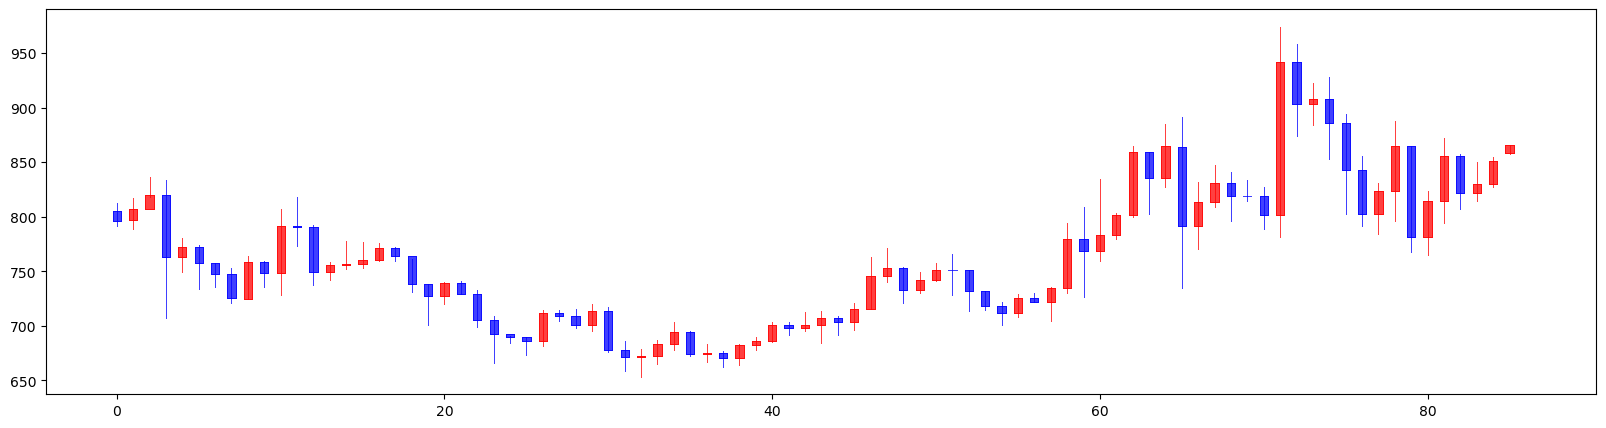

In [29]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)

candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'],
                  width = 0.5, colorup = 'r', colordown = 'b')

# 기술 지표 생성

In [2]:
# 이동평균 계산
def get_moving_average(data: 'Series', window = None):
    if window != None:
        ma = data.rolling(window = window).mean()
        
        return ma
    
    ma_20 = data.rolling(window = 20).mean()
    ma_50 = data.rolling(window = 50).mean()
    
    buy_signal_ma = np.where((ma_20 > ma_50) & (ma_20.shift(1) <= ma_50.shift(1)), ma_20, np.nan)
    sell_signal_ma = np.where((ma_20 < ma_50) & (ma_20.shift(1) >= ma_50.shift(1)), ma_20, np.nan)
    
    return ma_20, ma_50, buy_signal_ma, sell_signal_ma

# MACD 지표 계산
def get_macd(data: 'Series', slow = 26, fast = 12, signal = 9):
    exp1 = data.ewm(span = fast, adjust = False).mean() # 지수가중평균
    exp2 = data.ewm(span = slow, adjust = False).mean()
    macd = exp1 - exp2
    signal_line = macd.ewm(span = signal, adjust = False).mean()
    
    buy_signal_macd = np.where((macd > signal_line) & (macd.shift(1) <= signal_line.shift(1)), macd, np.nan)
    sell_signal_macd = np.where((macd < signal_line) & (macd.shift(1) >= signal_line.shift(1)), macd, np.nan)
    
    return macd, signal_line, buy_signal_macd, sell_signal_macd

# RSI 지표 계산
def get_rsi(data, window = 14):
    delta = data.diff() # 이전 행/열과의 차이 계산
    gain = (delta.where(delta > 0, 0)).rolling(window = window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window = window).mean()
    
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    buy_signal_rsi = np.where(rsi < 30, rsi, np.nan)
    sell_signal_rsi = np.where(rsi > 70, rsi, np.nan)
    
    return rsi, buy_signal_rsi, sell_signal_rsi

# 볼린저 밴드 계산
def get_bollinger_bands(data, window = 20, num_std = 2):
    mean = data.rolling(window = window).mean()
    std = data.rolling(window = window).std()
    
    upper_band = mean + (std * num_std)
    lower_band = mean - (std * num_std)
    
    buy_signal_bollinger = np.where(data < lower_band, data, np.nan)
    sell_signal_bollinger = np.where(data > upper_band, data, np.nan)
    
    return upper_band, lower_band, buy_signal_bollinger, sell_signal_bollinger

In [3]:
df = fdr.DataReader('005930', '2023')

In [4]:
df['ma_20'], df['ma_50'], df['buy_signal_ma'], df['sell_signal_ma'] = get_moving_average(df['Close'])
df['macd'], df['signal_line'], df['buy_signal_macd'], df['sell_signal_macd'] = get_macd(df['Close'])
df['rsi'], df['buy_signal_rsi'], df['sell_signal_rsi'] = get_rsi(df['Close'])
df['upper_band'], df['lower_band'], df['buy_signal_bollinger'], df['sell_signal_bollinger'] = get_bollinger_bands(df['Close'])

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,333.0,6.989550e+04,5.872014e+03,5.540000e+04,6.580000e+04,7.060000e+04,7.320000e+04,8.520000e+04
High,333.0,7.040811e+04,5.920718e+03,5.600000e+04,6.590000e+04,7.100000e+04,7.360000e+04,8.600000e+04
Low,333.0,6.926186e+04,5.776819e+03,5.450000e+04,6.500000e+04,7.000000e+04,7.270000e+04,8.450000e+04
Close,333.0,6.981922e+04,5.855318e+03,5.540000e+04,6.550000e+04,7.050000e+04,7.310000e+04,8.530000e+04
Volume,333.0,1.520431e+07,6.243049e+06,5.824628e+06,1.116006e+07,1.361499e+07,1.725967e+07,5.769127e+07
Change,333.0,1.180811e-03,1.432468e-02,-3.633491e-02,-7.884363e-03,0.000000e+00,8.333333e-03,6.128550e-02
ma_20,314.0,6.987424e+04,5.240257e+03,6.052500e+04,6.571500e+04,7.002000e+04,7.360875e+04,8.184000e+04
ma_50,284.0,6.976588e+04,4.338077e+03,6.118800e+04,6.824900e+04,6.979600e+04,7.365050e+04,7.808600e+04
buy_signal_ma,5.0,6.881600e+04,4.308243e+03,6.198500e+04,6.910500e+04,6.942500e+04,6.960000e+04,7.396500e+04
sell_signal_ma,4.0,7.068500e+04,2.388315e+03,6.854500e+04,6.901750e+04,7.017250e+04,7.184000e+04,7.385000e+04


In [7]:
df.isnull().sum()

Open                       0
High                       0
Low                        0
Close                      0
Volume                     0
Change                     0
ma_20                     19
ma_50                     49
buy_signal_ma            328
sell_signal_ma           329
macd                       0
signal_line                0
buy_signal_macd          320
sell_signal_macd         320
rsi                       13
buy_signal_rsi           317
sell_signal_rsi          287
upper_band                19
lower_band                19
buy_signal_bollinger     326
sell_signal_bollinger    312
dtype: int64

In [21]:
day_ago = df.index.max() - dateutil.relativedelta.relativedelta(months = 6)

In [28]:
df = df.loc[df.index >= day_ago]

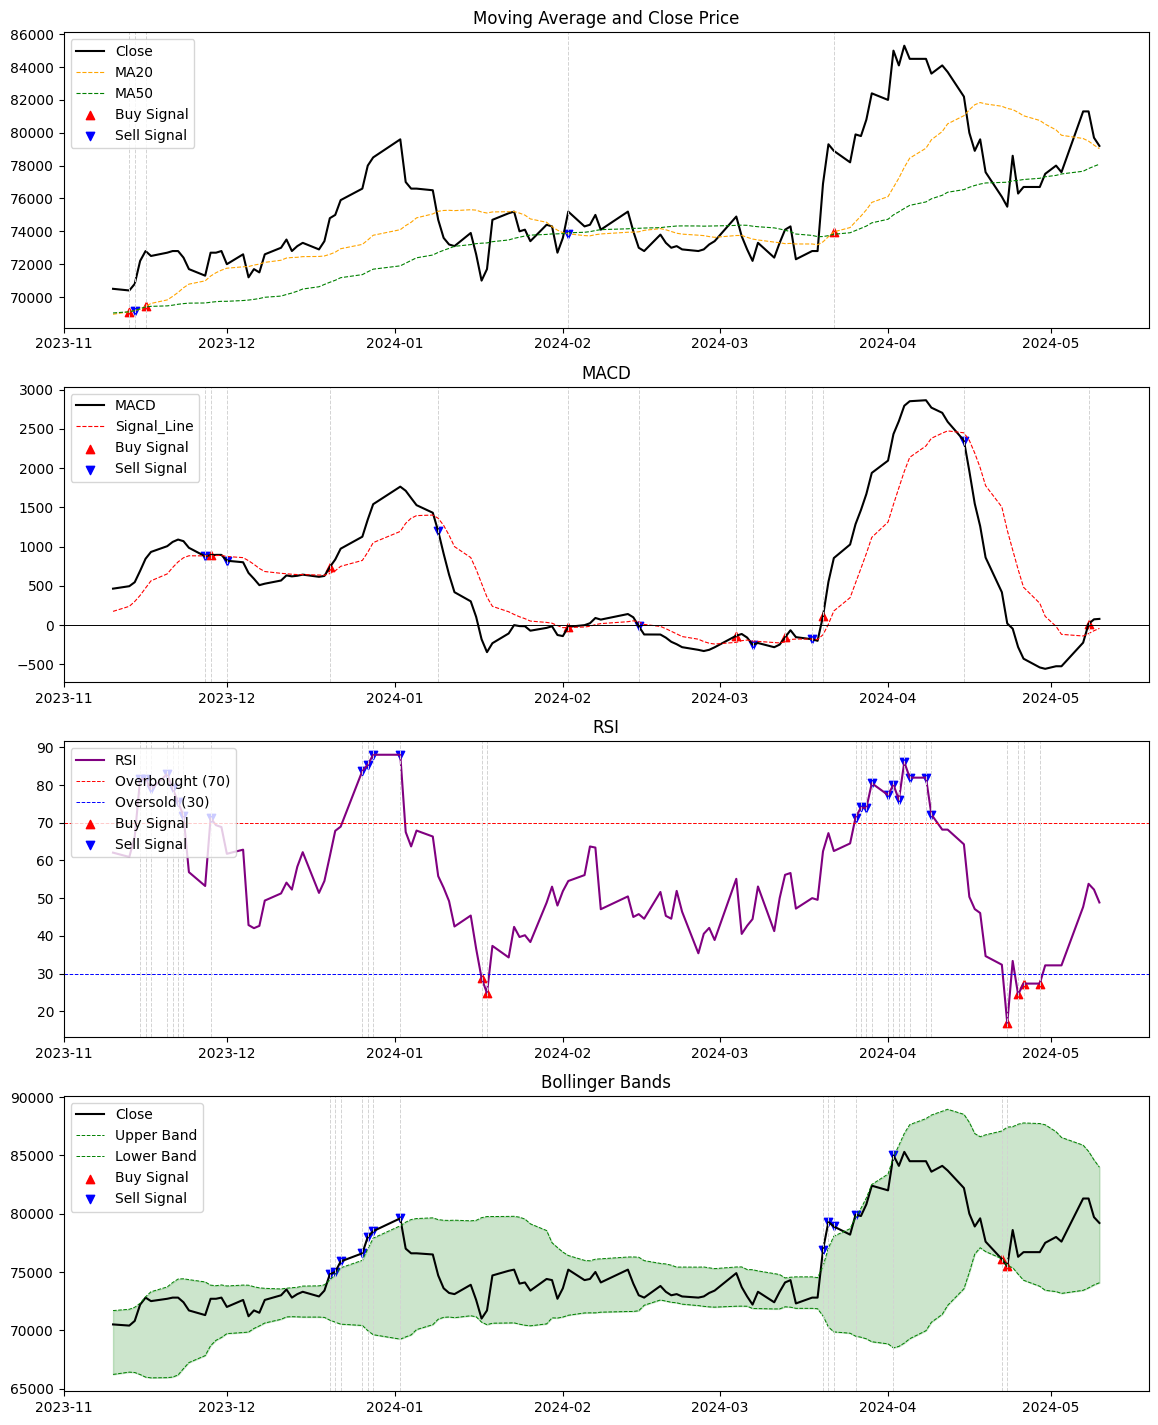

In [30]:
fig, axes = plt.subplots(nrows = 4,
                         ncols =1,
                         figsize = (14, 18),
#                          sharex = True,
                         dpi = 100)

# Moving Average
axes[0].plot(df.index, df['Close'], label = 'Close', color = 'black')
axes[0].plot(df.index, df['ma_20'], label = 'MA20', color = 'orange', linestyle = '--', linewidth = 0.8)
axes[0].plot(df.index, df['ma_50'], label = 'MA50', color = 'green', linestyle = '--', linewidth = 0.8)
axes[0].scatter(df.index, df['buy_signal_ma'], color = 'red', label = 'Buy Signal', marker = '^')
axes[0].scatter(df.index, df['sell_signal_ma'], color = 'blue', label = 'Sell Signal', marker = 'v')
for idx in df.iloc[np.where(df['buy_signal_ma'].notnull() | df['sell_signal_ma'].notnull())[0]].index:
    axes[0].axvline(idx, color = 'lightgray', linestyle = 'dashed', linewidth = 0.7)

axes[0].set_title('Moving Average and Close Price')
axes[0].legend(loc = 'upper left')

# MACD - (y = 0) 라인 그려주기
axes[1].plot(df.index, df['macd'], label = 'MACD', color = 'black')
axes[1].plot(df.index, df['signal_line'], label = 'Signal_Line', color = 'red', linestyle = '--', linewidth = 0.8)
axes[1].scatter(df.index, df['buy_signal_macd'], color = 'red', label = 'Buy Signal', marker = '^')
axes[1].scatter(df.index, df['sell_signal_macd'], color = 'blue', label = 'Sell Signal', marker = 'v')
for idx in df.iloc[np.where(df['buy_signal_macd'].notnull() | df['sell_signal_macd'].notnull())[0]].index:
    axes[1].axvline(idx, color = 'lightgray', linestyle = 'dashed', linewidth = 0.7)
axes[1].axhline(0, color = 'black', linewidth = 0.7)

axes[1].set_title('MACD')
axes[1].legend(loc = 'upper left')

# RSI지표
axes[2].plot(df.index, df['rsi'], label = 'RSI', color = 'purple')
axes[2].axhline(70, color = 'red', label = 'Overbought (70)', linestyle = 'dashed', linewidth = 0.7)
axes[2].axhline(30, color = 'blue', label = 'Oversold (30)', linestyle = 'dashed', linewidth = 0.7)
axes[2].scatter(df.index, df['buy_signal_rsi'], color = 'red', label = 'Buy Signal', marker = '^')
axes[2].scatter(df.index, df['sell_signal_rsi'], color = 'blue', label = 'Sell Signal', marker = 'v')
for idx in df.iloc[np.where(df['buy_signal_rsi'].notnull() | df['sell_signal_rsi'].notnull())[0]].index:
    axes[2].axvline(idx, color = 'lightgray', linestyle = 'dashed', linewidth = 0.7)
    
axes[2].set_title('RSI')
axes[2].legend(loc = 'upper left')

# Bollinger Band
axes[3].plot(df.index, df['Close'], label = 'Close', color = 'black')
axes[3].plot(df.index, df['upper_band'], label = 'Upper Band', color = 'green', linestyle = '--', linewidth = 0.7)
axes[3].plot(df.index, df['lower_band'], label = 'Lower Band', color = 'green', linestyle = '--', linewidth = 0.7)
axes[3].fill_between(df.index, df['upper_band'], df['lower_band'], color = 'green', alpha = 0.2)
axes[3].scatter(df.index, df['buy_signal_bollinger'], color = 'red', label = 'Buy Signal', marker = '^')
axes[3].scatter(df.index, df['sell_signal_bollinger'], color = 'blue', label = 'Sell Signal', marker = 'v')
for idx in df.iloc[np.where(df['buy_signal_bollinger'].notnull() | df['sell_signal_bollinger'].notnull())[0]].index:
    axes[3].axvline(idx, color = 'lightgray', linestyle = 'dashed', linewidth = 0.7)
axes[3].set_title('Bollinger Bands')
axes[3].legend(loc = 'upper left')

# x ticks
locator = mdates.WeekdayLocator(byweekday = mdates.MONDAY)
formatter = mdates.DateFormatter('%Y-%m-%d')
for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.grid(True)
    
    


plt.show()